# OpSim minion_1016 - DC2 DR6

1. 5-year observing quantities (in fits, nside=128):
  - Median MAF in each band: fiveSigmaDepth, Median_filtSkyBrightness, Median_FWHMeff,CoaddM5
  - Supreme map in each band: nexp_sum
  - Other: ebv, nstar

2. bin galaxies properties (mag, mag_err, redshifts) in certain range of the parameter

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

#import rubin_sim.maf as maf

import healpy as hp

import os

In [2]:
import sys

sys.path.insert(0, '../obs_eff_codes/')

import snr_mag_lsst as sml

In [3]:
#dump save
import pickle
#save this
def dump_save(stuff,filename):
    '''This saves the dictionary and loads it from appropriate files'''
    with open(filename,'wb') as fout:
        pickle.dump(stuff,fout,pickle.HIGHEST_PROTOCOL)
        #json.dump(self.impute, fout, sort_keys=True, indent=3)
    #print('written impute ditionary:',filename)
    return 0
def dump_load(filename):
    with open(filename,'rb') as fin:
        stuff=pickle.load(fin)
        #self.impute = json.load(fin)
    #print('loaded impute ditionary:',filename)
    return stuff

## 1. Load systematic maps

1.0. mask

In [5]:
#add the galmap mask
savedir='/global/cscratch1/sd/qhang/DESC_DC2_obs-dr6/'
fname = savedir+'obj_footprint_mask-nside-128.fits'
mask = hp.read_map(fname)

1.1. MAF maps

In [4]:
metric_name_list = ['Median_fiveSigmaDepth',
    'Median_filtSkyBrightness', 'Median_FWHMeff', 
    'CoaddM5']

band_list = ['u', 'g', 'r', 'i', 'z', 'y']

In [6]:
maf_maps = {}

Opsimdir = '/global/cscratch1/sd/qhang/minion_1016/MAF-5year/desc_maf/'
for jj in range(len(metric_name_list)):
    MAF=metric_name_list[jj]
    for ii in range(len(band_list)):
        band=band_list[ii]
        tag='_%s_%s_and_nightlt1825_HEAL.fits'%(MAF, band)
        title='%s-band %s'%(band, MAF)
            
        fname=Opsimdir+'minion_1016_dc2'+tag
        maf_maps[title] = (hp.read_map(fname))*mask
    print('Loaded: %s map.'%MAF)

Loaded: Median_fiveSigmaDepth map.
Loaded: Median_filtSkyBrightness map.
Loaded: Median_FWHMeff map.
Loaded: CoaddM5 map.


In [9]:
print(maf_maps.keys())

dict_keys(['u-band Median_fiveSigmaDepth', 'g-band Median_fiveSigmaDepth', 'r-band Median_fiveSigmaDepth', 'i-band Median_fiveSigmaDepth', 'z-band Median_fiveSigmaDepth', 'y-band Median_fiveSigmaDepth', 'u-band Median_filtSkyBrightness', 'g-band Median_filtSkyBrightness', 'r-band Median_filtSkyBrightness', 'i-band Median_filtSkyBrightness', 'z-band Median_filtSkyBrightness', 'y-band Median_filtSkyBrightness', 'u-band Median_FWHMeff', 'g-band Median_FWHMeff', 'r-band Median_FWHMeff', 'i-band Median_FWHMeff', 'z-band Median_FWHMeff', 'y-band Median_FWHMeff', 'u-band CoaddM5', 'g-band CoaddM5', 'r-band CoaddM5', 'i-band CoaddM5', 'z-band CoaddM5', 'y-band CoaddM5'])


1.2 supreme maps

In [7]:
sup_maps = {}

prop = 'nexp_sum'

supmapdir='/global/cscratch1/sd/qhang/minion_1016/MAF-5year/supreme_map/'

for ii in range(len(band_list)):
    band=band_list[ii]
    fname = supmapdir + 'supreme_dc2_dr6d_v3_%s_%s-nside-128.fits'%(band, prop)
    title = '%s-band %s'%(band, prop)
    sup_maps[title] = (hp.read_map(fname))*mask

In [14]:
print(sup_maps.keys())

dict_keys(['u-band nexp_sum', 'g-band nexp_sum', 'r-band nexp_sum', 'i-band nexp_sum', 'z-band nexp_sum', 'y-band nexp_sum'])


1.3 ebv and stellar map

In [8]:
other_maps = {}

othermapdir = '/global/cscratch1/sd/qhang/other_systematic_maps/'
fname = othermapdir + 'ebv_ring_rot_512.fits'
mapin = hp.read_map(fname)
mapin = hp.ud_grade(mapin, 128)
other_maps['ebv'] = mapin*mask

fname = othermapdir + 'allwise_total_rot_512.fits'
mapin = hp.read_map(fname)
mapin = hp.ud_grade(mapin, 128)
other_maps['stellar'] = mapin*mask

In [16]:
print(other_maps.keys())

dict_keys(['ebv', 'stellar'])


Show the variations for each map:

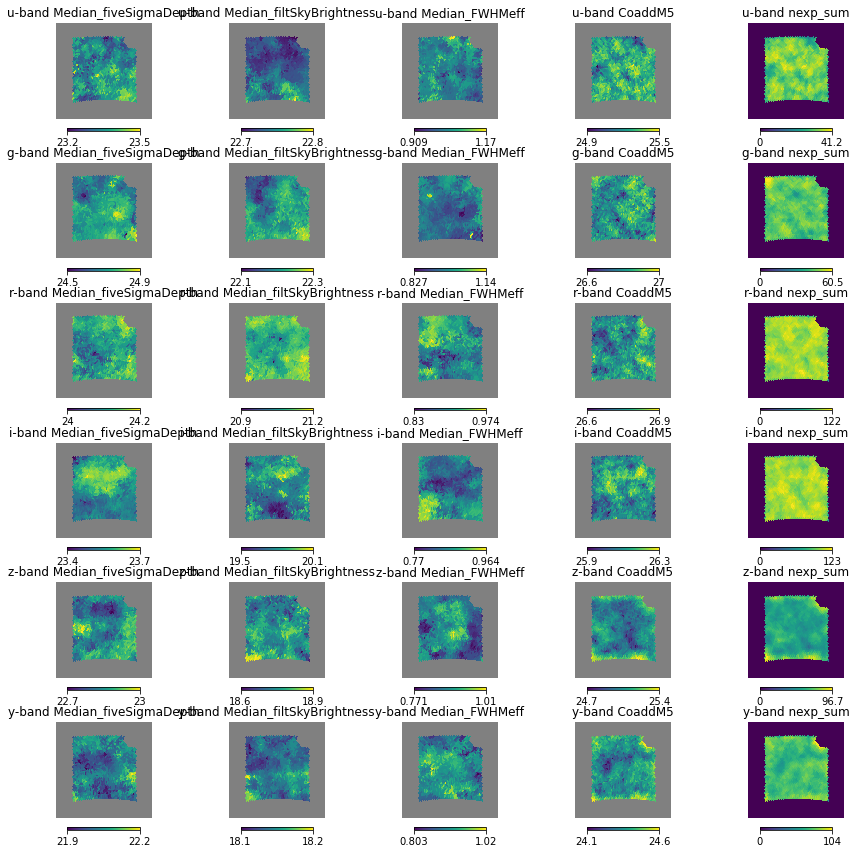

In [19]:
fig,axarr=plt.subplots(len(band_list),len(metric_name_list)+1, figsize=[15,15])

#Median value of these
for jj in range(len(metric_name_list)):
    MAF=metric_name_list[jj]
    for ii in range(len(band_list)):
        band=band_list[ii]
        key='%s-band %s'%(band,MAF)
        title='%s-band'%(band)

        plt.sca(axarr[ii,jj])
        hp.gnomview(maf_maps[key], rot=(62, -36.5, 0), xsize=100,ysize=100, reso=16, title=key, hold=True, 
                   notext=True)
    
for ii in range(len(band_list)):
    band=band_list[ii]
    plt.sca(axarr[ii,4])
    key = '%s-band %s'%(band, 'nexp_sum')
    hp.gnomview(sup_maps[key], rot=(62, -36.5, 0), xsize=100,ysize=100, reso=16, title=key, hold=True, 
                   notext=True)

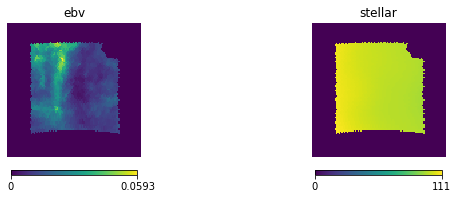

In [21]:
#show other maps:

fig,axarr=plt.subplots(1,2,figsize=[10,3])

plt.sca(axarr[0])
hp.gnomview(other_maps['ebv'], rot=(62, -36.5, 0), xsize=100,ysize=100, reso=16, title='ebv', hold=True, 
                   notext=True)

plt.sca(axarr[1])
hp.gnomview(other_maps['stellar'], rot=(62, -36.5, 0), xsize=100,ysize=100, reso=16, title='stellar', hold=True, 
                   notext=True)

Print for each map, the 20:60:20 percentile:

In [9]:
def find_percentiles(x, percent):
    sortind = np.argsort(x)
    xvalue_percent = np.zeros(len(percent))
    for ii in range(len(percent)):
        ind = int(len(x)*percent[ii])
        xvalue_percent[ii] = x[sortind[ind]]
    return xvalue_percent

In [10]:
percent = [0.2, 0.8]

maf_percentile={}

for jj in range(len(metric_name_list)):
    MAF=metric_name_list[jj]
    print(MAF)
    for ii in range(len(band_list)):
        band=band_list[ii]
        key='%s-band %s'%(band,MAF)
        
        usemap = (maf_maps[key])[mask.astype(bool)]
        
        maf_percentile[key] = find_percentiles(usemap, percent)
        print(band, maf_percentile[key])
    print('\n')

Median_fiveSigmaDepth
u [23.30315859 23.39743515]
g [24.64492932 24.73132474]
r [24.09589875 24.16334225]
i [23.51055223 23.61524087]
z [22.77595513 22.89200218]
y [21.9649314  22.03708917]


Median_filtSkyBrightness
u [22.69838739 22.72432692]
g [22.1922773  22.23243284]
r [21.07967301 21.12773901]
i [19.71782566 19.88103683]
z [18.68686809 18.76430024]
y [18.13996907 18.17042562]


Median_FWHMeff
u [1.001846 1.051588]
g [0.910862 0.976048]
r [0.884889  0.9280825]
i [0.822751  0.8834445]
z [0.8288415 0.911798 ]
y [0.886434 0.936725]


CoaddM5
u [25.20389065 25.33820532]
g [26.73568181 26.85605968]
r [26.68073201 26.76599385]
i [26.07409671 26.17215702]
z [24.98644896 25.17201058]
y [24.3221157  24.44096473]




In [11]:
percent = [0.2, 0.8]

sup_percentile = {}
print('nexp_sum')
for ii in range(len(band_list)):
    band=band_list[ii]
    key = '%s-band %s'%(band, 'nexp_sum')
    
    usemap = (sup_maps[key])[mask.astype(bool)]
    sup_percentile[key] = find_percentiles(usemap, percent)
    print(band, sup_percentile[key])

nexp_sum
u [29.04634094 35.1678009 ]
g [41.53033541 48.35551453]
r [ 99.18864441 110.59046936]
i [100.27244568 111.51937866]
z [51.93615723 65.05487061]
y [67.17895508 78.37051392]


In [12]:
percent = [0.2, 0.8]

other_percentile = {}

usemap = (other_maps['ebv'])[mask.astype(bool)]
other_percentile['ebv'] = find_percentiles(usemap, percent)
print('ebv', other_percentile['ebv'])


usemap = (other_maps['stellar'])[mask.astype(bool)]
other_percentile['stellar'] = find_percentiles(usemap, percent)
print('stellar', other_percentile['stellar'])

ebv [0.00956841 0.02482882]
stellar [ 98.86605072 105.26630402]


Covariance betwene different observables in each band:

In [31]:
def corr_mat(cov):
    corr=np.zeros(cov.shape)
    for ii in range(0,cov.shape[0]):
        for jj in range(0,cov.shape[1]):
            corr[ii,jj]=cov[ii,jj]/np.sqrt(cov[ii,ii]*cov[jj,jj])
            
    return corr   

In [35]:
Npix = sum(mask)
Nmaf = len(maf_maps.keys())
Nsup = len(sup_maps.keys())
#add ebv

print(Npix, Nmaf+Nsup+1)

datamatrix = np.zeros((int(Nmaf+Nsup+1), int(Npix)))

for ii, key in enumerate(maf_maps.keys()):
    datamatrix[ii,:] = maf_maps[key][mask.astype(bool)]

for ii, key in enumerate(sup_maps.keys()):
    datamatrix[Nmaf+ii,:] = sup_maps[key][mask.astype(bool)]

datamatrix[-1,:] = other_maps['ebv'][mask.astype(bool)]

#mask out all bands combined
cov = np.cov(datamatrix)
print(cov.shape)

1387.0 31
(31, 31)


([<matplotlib.axis.XTick at 0x155507376eb0>,
 [Text(2.5, 0, 'Median_fiveSigmaDepth'),
  Text(8.5, 0, 'Median_filtSkyBrightness'),
  Text(14.5, 0, 'Median_FWHMeff'),
  Text(20.5, 0, 'CoaddM5'),
  Text(26.5, 0, 'nexp_sum'),
  Text(30.0, 0, 'ebv')])

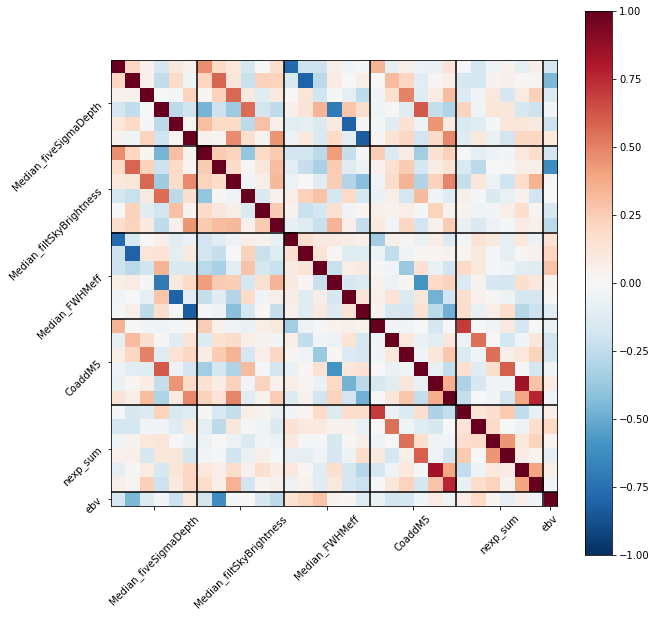

In [42]:
plt.figure(figsize=[10,10])
#correlation matrix
corr = corr_mat(cov)
plt.imshow(corr, vmax=1, vmin=-1, cmap='RdBu_r')
plt.colorbar()
for ii in range(5):
    plt.plot([-0.5, 30.5], [5.5+ii*6, 5.5+ii*6], 'k')
    plt.plot([5.5+ii*6, 5.5+ii*6], [-0.5, 30.5], 'k')
    
y=[2.5, 8.5, 14.5, 20.5, 26.5,30]
labels=['Median_fiveSigmaDepth',
       'Median_filtSkyBrightness', 'Median_FWHMeff', 'CoaddM5',
       'nexp_sum',
       'ebv']

plt.yticks(y, labels, rotation = 45)
plt.xticks(y, labels, rotation = 45)

# For each band, look at the variation for each map with magnitude and magnitude error, and photo-z

In [13]:
#import the code
import measure_properties_with_systematics as mp

In [11]:
#now try to run the code:
mag_bins = {
    'u': np.linspace(24,28,6),
    'g': np.linspace(25,29,6),
    'r': np.linspace(25,29,6),
    'i': np.linspace(24,25.3,6),
    'z': np.linspace(23,27,6),
    'y': np.linspace(22,27,6),
}

pz_bins = np.array([0,0.5,1.0,1.5,2.0])

indir = '/global/cscratch1/sd/qhang/DESC_DC2_obs-dr6/DC2_obj_with_pz'


In [16]:
mag_bins_cens = {}

for key in mag_bins.keys():
    mag_bins_cens[key] = ((mag_bins[key] + np.roll(mag_bins[key],1))*0.5)[1:]
    
pz_bins_cens = ((pz_bins + np.roll(pz_bins,1))*0.5)[1:]

CoaddM5:

In [10]:
#select the pixels:
selected_pix = {}

#try coadd M5
MAF = 'CoaddM5'
for ii in range(len(band_list)):
    band=band_list[ii]
    key='%s-band %s'%(band,MAF)
    
    selected_pix[key] = mp.select_pixels_from_sysmap(maf_maps[key], mask, maf_percentile[key])

In [11]:
print(selected_pix.keys())
print(len(selected_pix['u-band CoaddM5']))
for ii in range(3):
    print(len(selected_pix['u-band CoaddM5'][ii]))

dict_keys(['u-band CoaddM5', 'g-band CoaddM5', 'r-band CoaddM5', 'i-band CoaddM5', 'z-band CoaddM5', 'y-band CoaddM5'])
3
277
832
278


In [12]:

mean, std = mp.scan_over_tracts(selected_pix, mag_bins, pz_bins, indir)


3 sets of pixels.
Done 0 tracts.
Done 50 tracts.
Done 100 tracts.
Done 150 tracts.
Computing mean and std


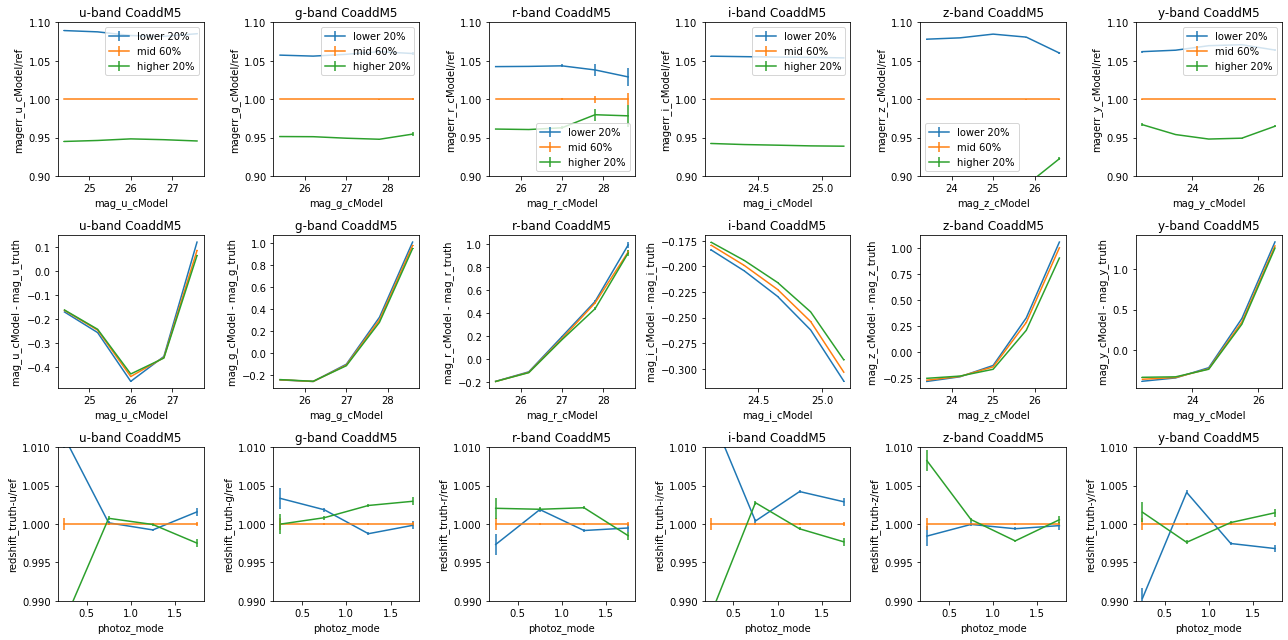

In [31]:
#try to plot this

fig,axarr=plt.subplots(3,6,figsize=[18,9])

MAF='CoaddM5'
label=['lower 20%', 'mid 60%', 'higher 20%']

for ii, bb in enumerate(band_list):
    plt.sca(axarr[0, ii])
    key = '%s-band %s'%(bb, MAF)
    subkey = 'magerr_%s_cModel'%bb
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(mag_bins_cens[bb], data[kk,:]/data[1,:], yerr=error[kk,:]/data[1,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey+'/ref')
    plt.xlabel('mag_%s_cModel'%bb)
    plt.ylim([0.90, 1.10])
    plt.legend()
    
    plt.sca(axarr[1, ii])
    key = '%s-band %s'%(bb, MAF)
    subkey = 'mag_%s_cModel - mag_%s_truth'%(bb,bb)
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(mag_bins_cens[bb], data[kk,:], yerr=error[kk,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey)
    plt.xlabel('mag_%s_cModel'%bb)
    
    plt.sca(axarr[2, ii])
    key = '%s-band %s'%(bb, MAF)
    subkey = 'redshift_truth-%s'%bb
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(pz_bins_cens, data[kk,:]/data[1,:], yerr=error[kk,:]/data[1,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey+'/ref')
    plt.xlabel('photoz_mode')
    plt.ylim([1-0.010,1+0.010])

plt.tight_layout()

Median_fiveSigmaDepth:

In [17]:
#select the pixels:
selected_pix = {}

MAF = 'Median_fiveSigmaDepth'
for ii in range(len(band_list)):
    band=band_list[ii]
    key='%s-band %s'%(band,MAF)
    
    selected_pix[key] = mp.select_pixels_from_sysmap(maf_maps[key], mask, maf_percentile[key])


mean, std = mp.scan_over_tracts(selected_pix, mag_bins, pz_bins, indir)

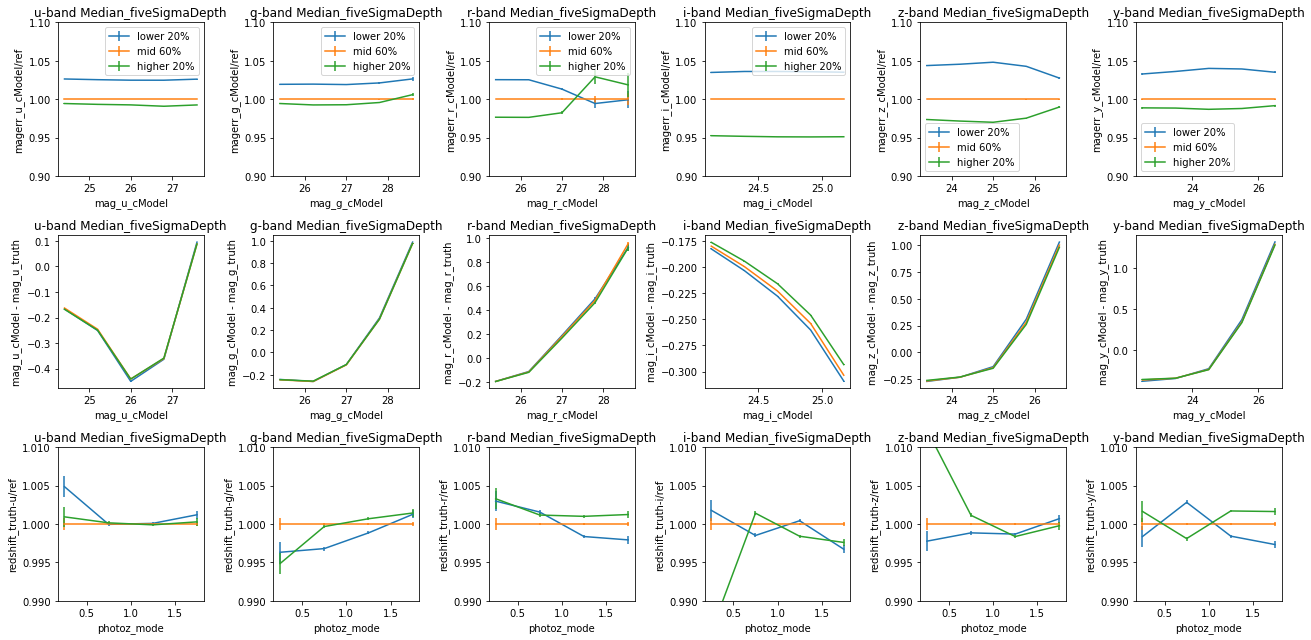

In [18]:
#try to plot this

fig,axarr=plt.subplots(3,6,figsize=[18,9])

#MAF='Median_fiveSigmaDepth'
label=['lower 20%', 'mid 60%', 'higher 20%']

for ii, bb in enumerate(band_list):
    plt.sca(axarr[0, ii])
    key = '%s-band %s'%(bb, MAF)
    subkey = 'magerr_%s_cModel'%bb
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(mag_bins_cens[bb], data[kk,:]/data[1,:], yerr=error[kk,:]/data[1,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey+'/ref')
    plt.xlabel('mag_%s_cModel'%bb)
    plt.ylim([0.90, 1.10])
    plt.legend()
    
    plt.sca(axarr[1, ii])
    key = '%s-band %s'%(bb, MAF)
    subkey = 'mag_%s_cModel - mag_%s_truth'%(bb,bb)
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(mag_bins_cens[bb], data[kk,:], yerr=error[kk,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey)
    plt.xlabel('mag_%s_cModel'%bb)
    
    plt.sca(axarr[2, ii])
    key = '%s-band %s'%(bb, MAF)
    subkey = 'redshift_truth-%s'%bb
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(pz_bins_cens, data[kk,:]/data[1,:], yerr=error[kk,:]/data[1,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey+'/ref')
    plt.xlabel('photoz_mode')
    plt.ylim([1-0.010,1+0.010])

plt.tight_layout()

Median_filtSkyBrightness

In [19]:
#select the pixels:
selected_pix = {}

MAF = 'Median_filtSkyBrightness'
for ii in range(len(band_list)):
    band=band_list[ii]
    key='%s-band %s'%(band,MAF)
    
    selected_pix[key] = mp.select_pixels_from_sysmap(maf_maps[key], mask, maf_percentile[key])


mean, std = mp.scan_over_tracts(selected_pix, mag_bins, pz_bins, indir)

3 sets of pixels.
Done 0 tracts.
Done 50 tracts.
Done 100 tracts.
Done 150 tracts.
Computing mean and std


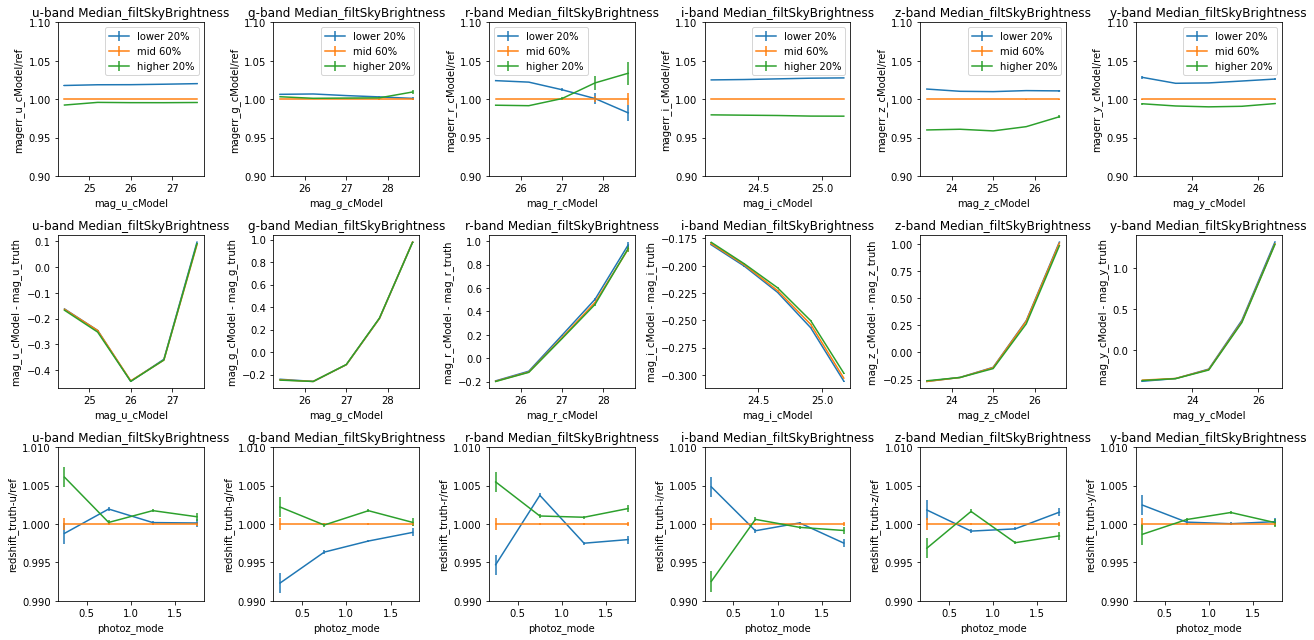

In [20]:
#try to plot this

fig,axarr=plt.subplots(3,6,figsize=[18,9])

label=['lower 20%', 'mid 60%', 'higher 20%']

for ii, bb in enumerate(band_list):
    plt.sca(axarr[0, ii])
    key = '%s-band %s'%(bb, MAF)
    subkey = 'magerr_%s_cModel'%bb
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(mag_bins_cens[bb], data[kk,:]/data[1,:], yerr=error[kk,:]/data[1,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey+'/ref')
    plt.xlabel('mag_%s_cModel'%bb)
    plt.ylim([0.90, 1.10])
    plt.legend()
    
    plt.sca(axarr[1, ii])
    key = '%s-band %s'%(bb, MAF)
    subkey = 'mag_%s_cModel - mag_%s_truth'%(bb,bb)
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(mag_bins_cens[bb], data[kk,:], yerr=error[kk,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey)
    plt.xlabel('mag_%s_cModel'%bb)
    
    plt.sca(axarr[2, ii])
    key = '%s-band %s'%(bb, MAF)
    subkey = 'redshift_truth-%s'%bb
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(pz_bins_cens, data[kk,:]/data[1,:], yerr=error[kk,:]/data[1,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey+'/ref')
    plt.xlabel('photoz_mode')
    plt.ylim([1-0.010,1+0.010])

plt.tight_layout()

Median_FWHMeff

In [21]:
#select the pixels:
selected_pix = {}

MAF = 'Median_FWHMeff'
for ii in range(len(band_list)):
    band=band_list[ii]
    key='%s-band %s'%(band,MAF)
    
    selected_pix[key] = mp.select_pixels_from_sysmap(maf_maps[key], mask, maf_percentile[key])


mean, std = mp.scan_over_tracts(selected_pix, mag_bins, pz_bins, indir)

3 sets of pixels.
Done 0 tracts.
Done 50 tracts.
Done 100 tracts.
Done 150 tracts.
Computing mean and std


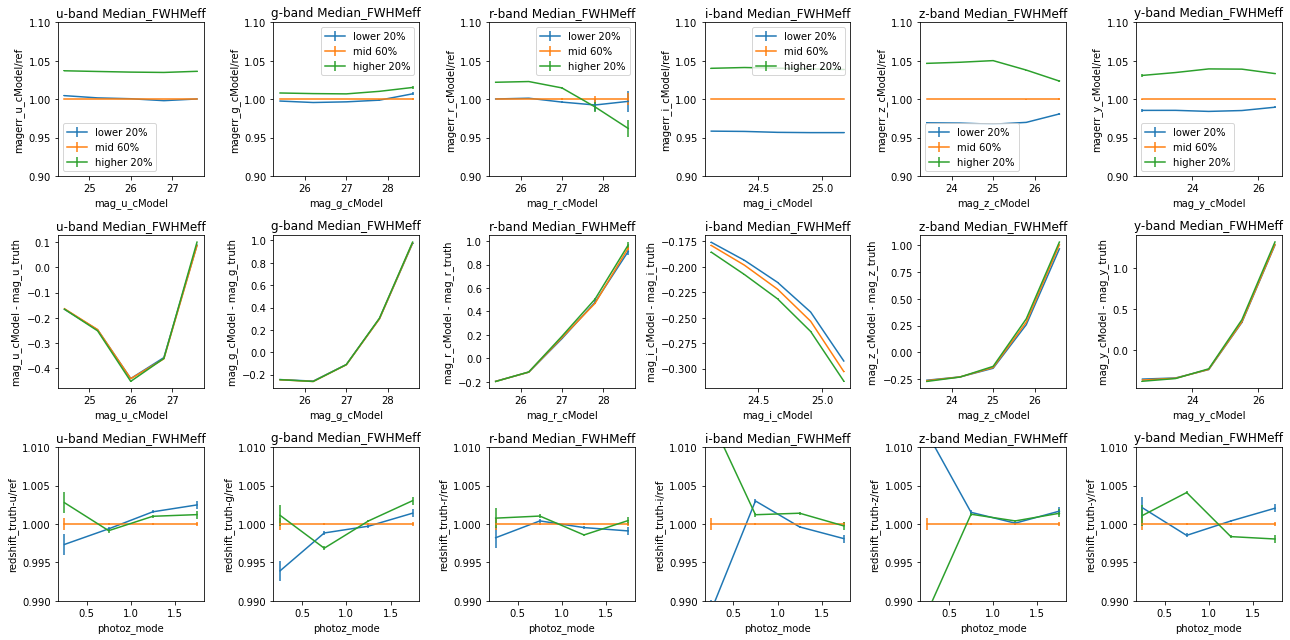

In [23]:
#try to plot this

fig,axarr=plt.subplots(3,6,figsize=[18,9])

label=['lower 20%', 'mid 60%', 'higher 20%']

for ii, bb in enumerate(band_list):
    plt.sca(axarr[0, ii])
    key = '%s-band %s'%(bb, MAF)
    subkey = 'magerr_%s_cModel'%bb
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(mag_bins_cens[bb], data[kk,:]/data[1,:], yerr=error[kk,:]/data[1,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey+'/ref')
    plt.xlabel('mag_%s_cModel'%bb)
    plt.ylim([0.90, 1.10])
    plt.legend()
    
    plt.sca(axarr[1, ii])
    key = '%s-band %s'%(bb, MAF)
    subkey = 'mag_%s_cModel - mag_%s_truth'%(bb,bb)
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(mag_bins_cens[bb], data[kk,:], yerr=error[kk,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey)
    plt.xlabel('mag_%s_cModel'%bb)
    
    plt.sca(axarr[2, ii])
    key = '%s-band %s'%(bb, MAF)
    subkey = 'redshift_truth-%s'%bb
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(pz_bins_cens, data[kk,:]/data[1,:], yerr=error[kk,:]/data[1,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey+'/ref')
    plt.xlabel('photoz_mode')
    plt.ylim([1-0.010,1+0.010])

plt.tight_layout()

nexp_sum

In [24]:
#select the pixels:
selected_pix = {}

for ii in range(len(band_list)):
    band=band_list[ii]
    key='%s-band %s'%(band,'nexp_sum')
    
    selected_pix[key] = mp.select_pixels_from_sysmap(sup_maps[key], mask, sup_percentile[key])


mean, std = mp.scan_over_tracts(selected_pix, mag_bins, pz_bins, indir)

3 sets of pixels.
Done 0 tracts.
Done 50 tracts.
Done 100 tracts.
Done 150 tracts.
Computing mean and std


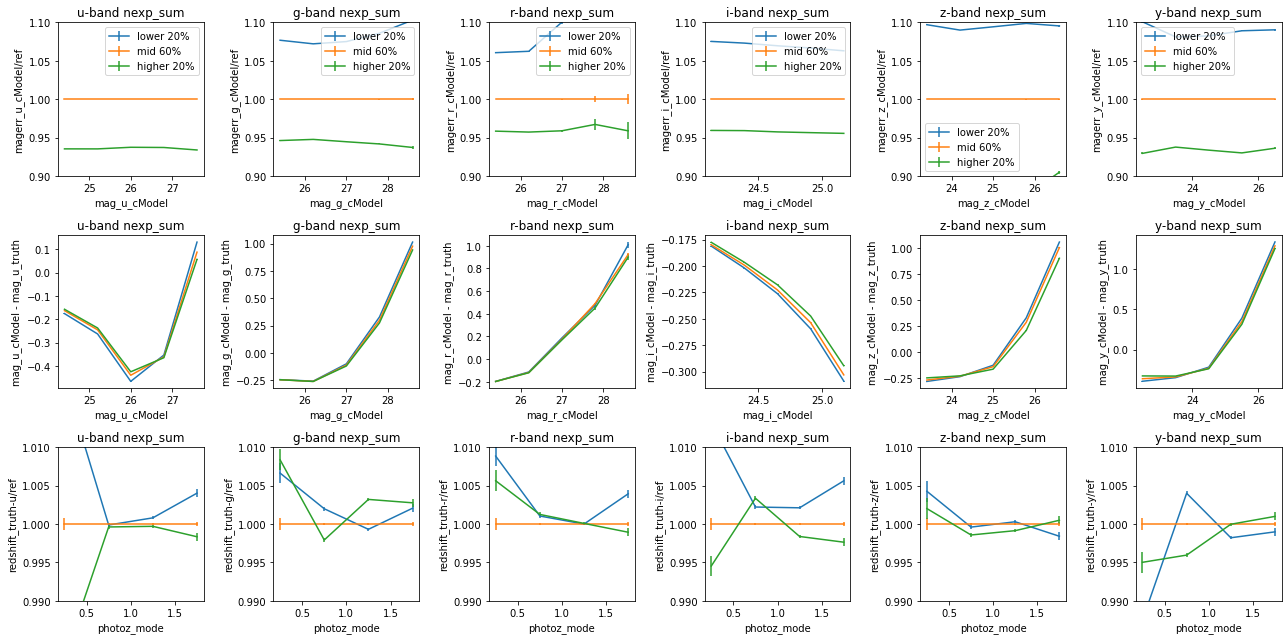

In [25]:
#try to plot this

fig,axarr=plt.subplots(3,6,figsize=[18,9])

label=['lower 20%', 'mid 60%', 'higher 20%']
prop='nexp_sum'

for ii, bb in enumerate(band_list):
    plt.sca(axarr[0, ii])
    key = '%s-band %s'%(bb, prop)
    subkey = 'magerr_%s_cModel'%bb
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(mag_bins_cens[bb], data[kk,:]/data[1,:], yerr=error[kk,:]/data[1,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey+'/ref')
    plt.xlabel('mag_%s_cModel'%bb)
    plt.ylim([0.90, 1.10])
    plt.legend()
    
    plt.sca(axarr[1, ii])
    key = '%s-band %s'%(bb, prop)
    subkey = 'mag_%s_cModel - mag_%s_truth'%(bb,bb)
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(mag_bins_cens[bb], data[kk,:], yerr=error[kk,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey)
    plt.xlabel('mag_%s_cModel'%bb)
    
    plt.sca(axarr[2, ii])
    key = '%s-band %s'%(bb, prop)
    subkey = 'redshift_truth-%s'%bb
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(pz_bins_cens, data[kk,:]/data[1,:], yerr=error[kk,:]/data[1,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey+'/ref')
    plt.xlabel('photoz_mode')
    plt.ylim([1-0.010,1+0.010])

plt.tight_layout()

ebv

In [26]:
#select the pixels:
selected_pix = {}

for ii in range(len(band_list)):
    band=band_list[ii]
    key='%s-band %s'%(band,'ebv')
    
    selected_pix[key] = mp.select_pixels_from_sysmap(other_maps['ebv'], mask, other_percentile['ebv'])


mean, std = mp.scan_over_tracts(selected_pix, mag_bins, pz_bins, indir)

3 sets of pixels.
Done 0 tracts.
Done 50 tracts.
Done 100 tracts.
Done 150 tracts.
Computing mean and std


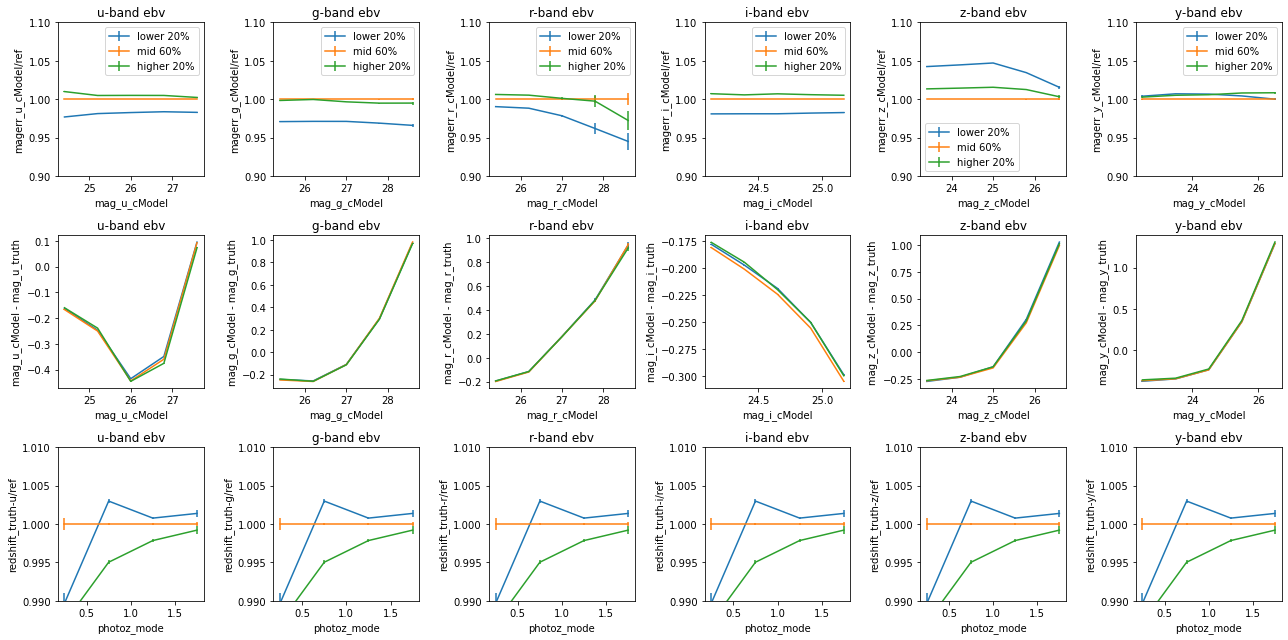

In [27]:
#try to plot this

fig,axarr=plt.subplots(3,6,figsize=[18,9])

label=['lower 20%', 'mid 60%', 'higher 20%']
prop='ebv'

for ii, bb in enumerate(band_list):
    plt.sca(axarr[0, ii])
    key = '%s-band %s'%(bb, prop)
    subkey = 'magerr_%s_cModel'%bb
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(mag_bins_cens[bb], data[kk,:]/data[1,:], yerr=error[kk,:]/data[1,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey+'/ref')
    plt.xlabel('mag_%s_cModel'%bb)
    plt.ylim([0.90, 1.10])
    plt.legend()
    
    plt.sca(axarr[1, ii])
    key = '%s-band %s'%(bb, prop)
    subkey = 'mag_%s_cModel - mag_%s_truth'%(bb,bb)
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(mag_bins_cens[bb], data[kk,:], yerr=error[kk,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey)
    plt.xlabel('mag_%s_cModel'%bb)
    
    plt.sca(axarr[2, ii])
    key = '%s-band %s'%(bb, prop)
    subkey = 'redshift_truth-%s'%bb
    data = mean[key][subkey]
    error = std[key][subkey]
    for kk in range(data.shape[0]):
        plt.errorbar(pz_bins_cens, data[kk,:]/data[1,:], yerr=error[kk,:]/data[1,:], label=label[kk])
    plt.title(key)
    plt.ylabel(subkey+'/ref')
    plt.xlabel('photoz_mode')
    plt.ylim([1-0.010,1+0.010])

plt.tight_layout()